In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz

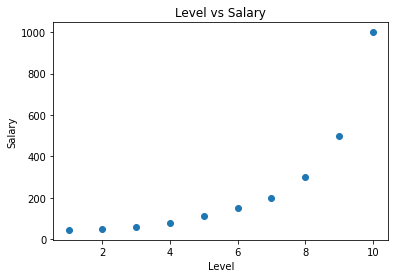

In [3]:
level = pd.Series([1,2,3,4,5,6,7,8,9,10])
salary = pd.Series([45,50,60,80,111,150,200,300,500,1000])
x_level = level.values.reshape(-1,1)
y_salary = salary
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(x_level, y_salary)
plt.show()

In [4]:
# drtm = decision regresion tree model
drtm = DecisionTreeRegressor(random_state=0)
drtm.fit(x_level, y_salary)

DecisionTreeRegressor(random_state=0)

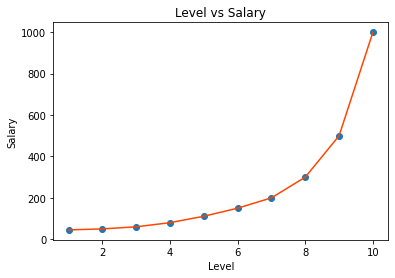

In [5]:
y_predict_salary = drtm.predict(x_level)
plt.plot(x_level, y_predict_salary, color='orangered')

plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.scatter(x_level, y_salary)
plt.show()

In [6]:
# Generar el arbol. 
# Entrar en webgraphviz.com copiar el codigo del archivo y pegarlo
export_graphviz(drtm, out_file = 'tree.dot', feature_names= ['Level'])

In [7]:
from sklearn.datasets import load_boston
ds_boston = load_boston()
ds_boston

c:\Users\Lucyfer\Documents\Fernando\EntornosVirtuales\data_analytics\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datase

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
x_features = ds_boston.data
y_prices = ds_boston.target

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_prices, test_size=0.2, random_state=42)

In [10]:
drtm_boston = DecisionTreeRegressor()
drtm_boston.fit(x_train, y_train)

DecisionTreeRegressor()

In [11]:
y_expected = y_test
y_predicted = drtm_boston.predict(x_test)
r2 = metrics.r2_score(y_expected, y_predicted)
print('The model performance for test set')
print(f'R2 score is {r2} ')

The model performance for test set
R2 score is 0.8544206790804523 


In [12]:
# Generar el arbol. 
# Entrar en webgraphviz.com copiar el codigo del archivo y pegarlo
export_graphviz(drtm_boston, out_file = 'tree_boston.dot', feature_names=ds_boston.feature_names )

In [15]:
y_predict = drtm_boston.predict(x_features)
df_actual_predict = pd.DataFrame({'Actual': y_prices, 'Prediction': y_predict})
df_actual_predict.head(15)

,Actual,Prediction
0,24.0,32.5
1,21.6,21.6
2,34.7,33.0
3,33.4,33.4
4,36.2,36.2
5,28.7,28.7
6,22.9,22.9
7,27.1,27.1
8,16.5,16.5
9,18.9,21.4


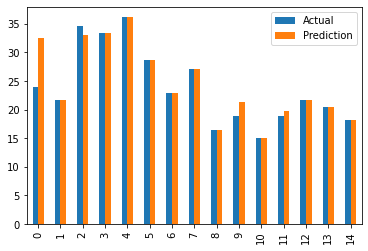

In [17]:
df_actual_predict.head(15).plot(kind='bar')
plt.show()